In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('../')

In [2]:
import numpy as np

In [3]:
from src.data_processing.io.image import Image

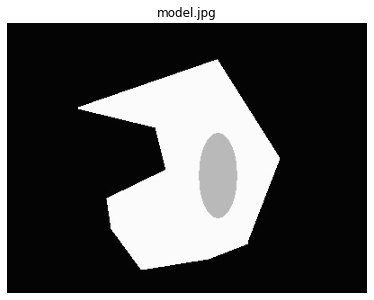

In [4]:
model = Image.from_file("../data/model.jpg")
model.plot()

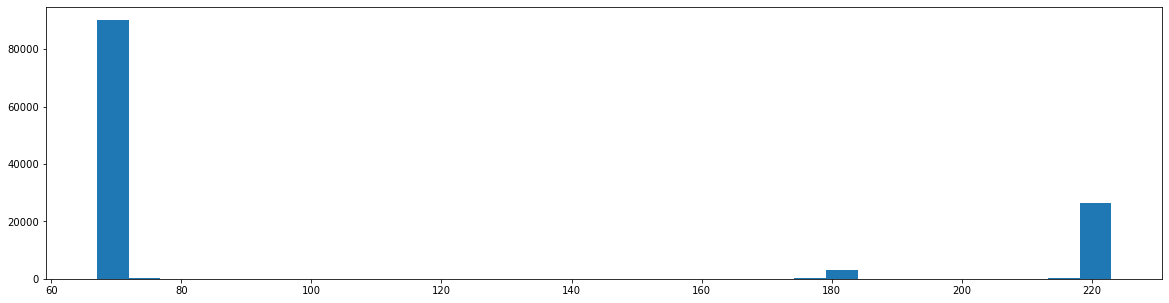

In [5]:
model.histogram(32)

In [6]:
from src.data_processing.proc.conour import histogram_segmentation, get_countour

In [7]:
tmp = histogram_segmentation(model, 220, 2, 1)

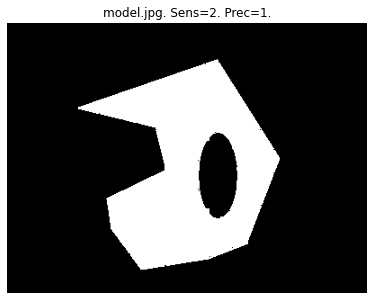

In [8]:
tmp.plot()

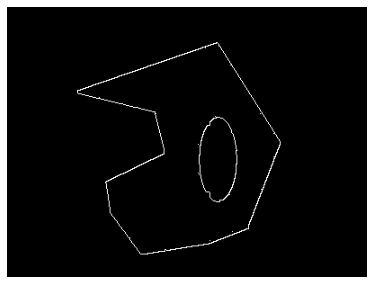

In [9]:
get_countour(tmp).plot()

In [10]:
noised = model.noise(0.15, "gauss").noise(0.15, "sp")

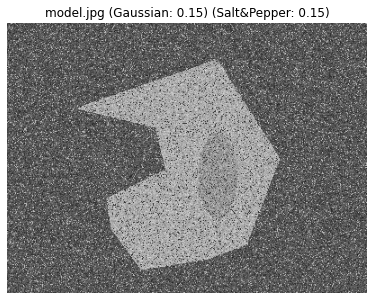

In [11]:
noised.plot()

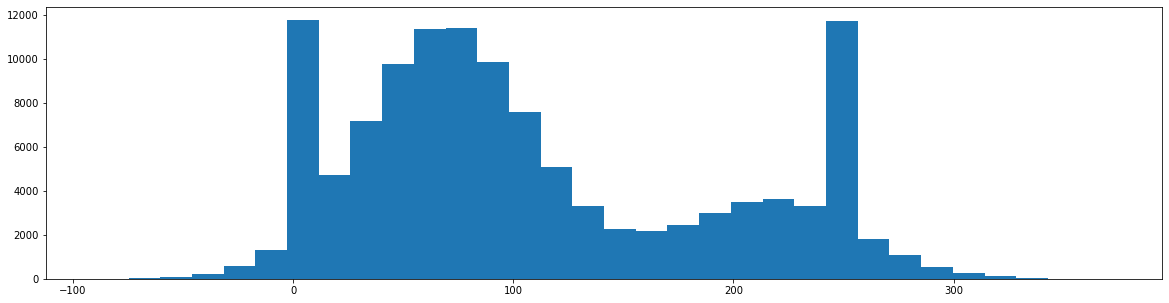

In [12]:
noised.histogram(32)

In [13]:
from src.data_processing.analysis import dft, get_frequency_spectrum
from src.base.line import Line

In [14]:
d_orig = dft(Line(model.img[100]))

In [15]:
d_noise = dft(Line(noised.img[100]))

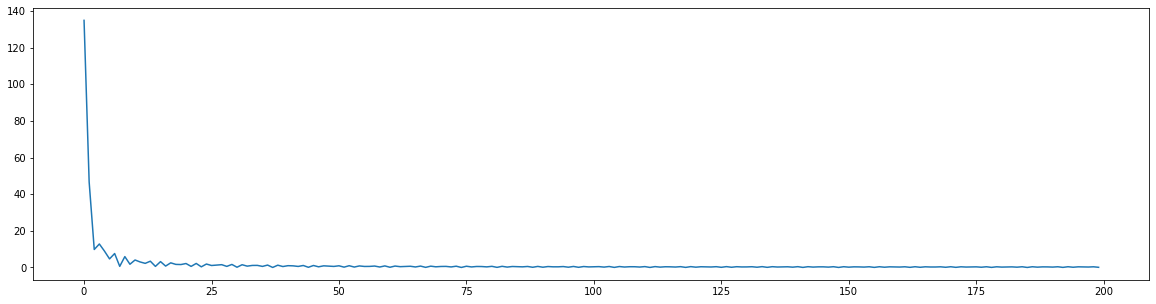

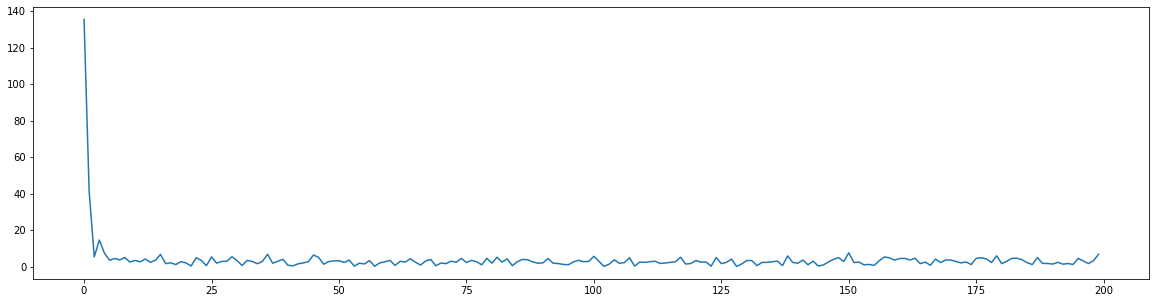

In [16]:
get_frequency_spectrum(d_orig).plot()
get_frequency_spectrum(d_noise).plot()

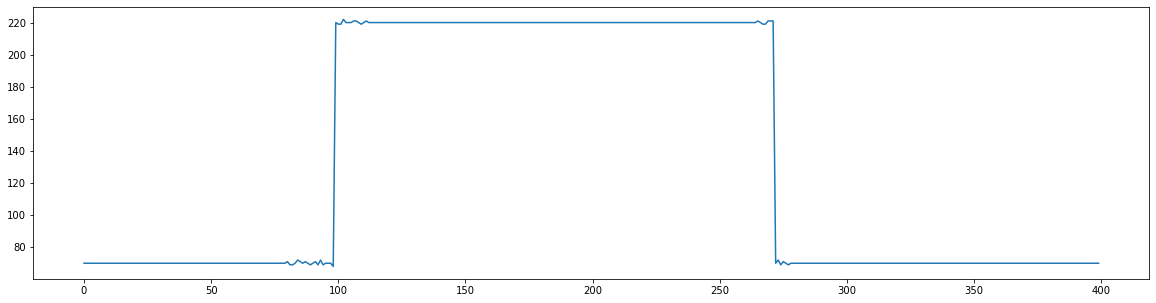

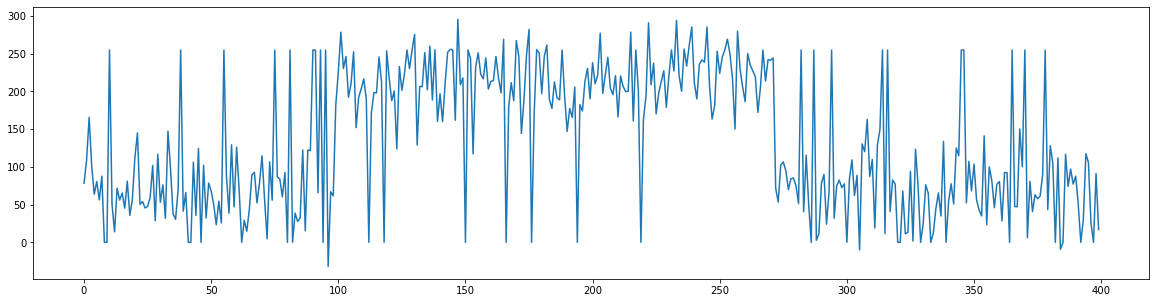

In [17]:
Line(model.img[100]).plot()
Line(noised.img[100]).plot()

In [18]:
from src.data_processing.proc.filters import lpf_line, lpf_pic

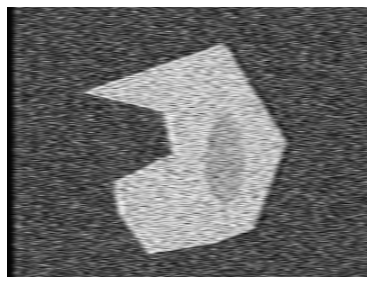

In [19]:
lpf_filtered_img = lpf_pic(noised, 30)
lpf_filtered_img.plot()

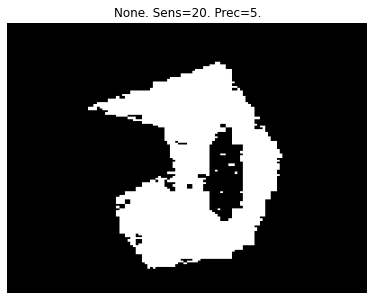

In [20]:
tmp = histogram_segmentation(lpf_filtered_img, 220, 20, 5)
tmp.plot()

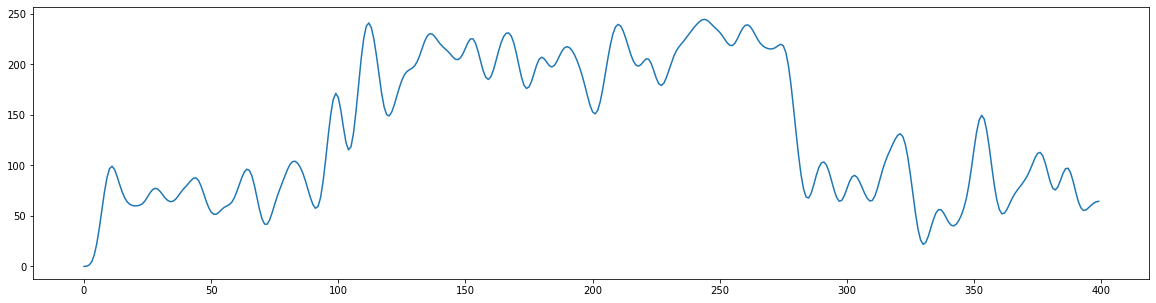

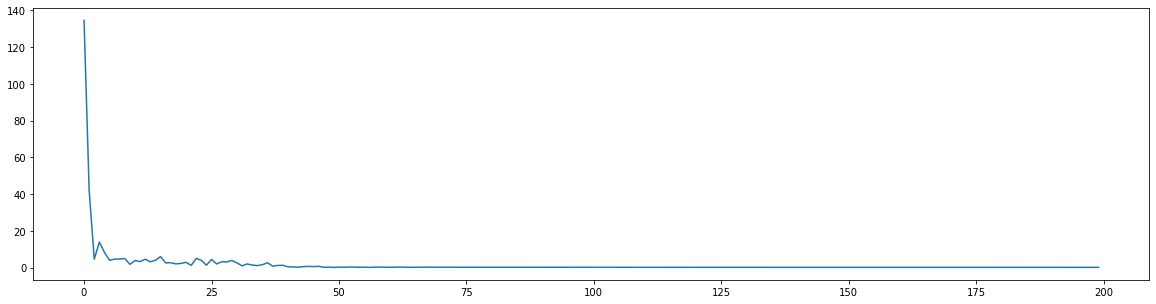

In [21]:
lpf_filtered_line = lpf_line(Line(noised.img[100]), 30)
lpf_filtered_line.plot()
get_frequency_spectrum(dft(lpf_filtered_line)).plot()

In [22]:
from src.data_processing.proc.filters import bsf_line, bsf_pic

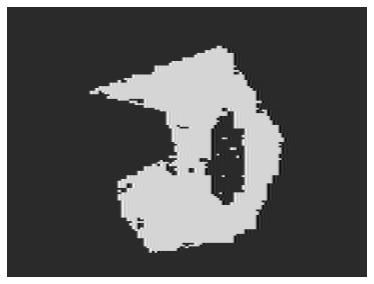

In [39]:
res = lpf_pic(tmp, 100)
res.plot()

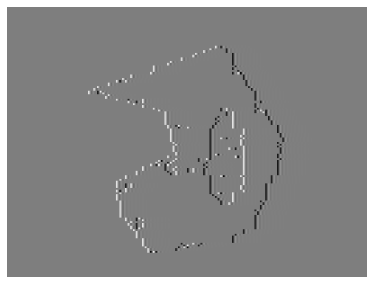

In [40]:
res2 = Image(tmp.img - res.img)
res2.plot()

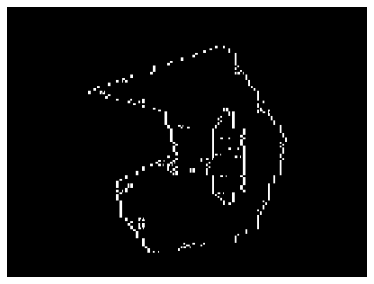

In [45]:
res2.threashold(25).plot()

In [ ]:
from src.data_processing.analysis import extract_range

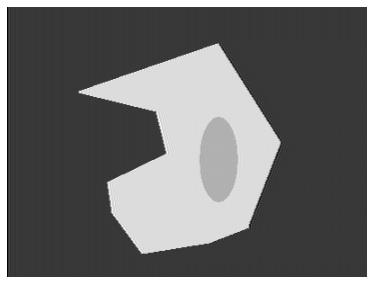

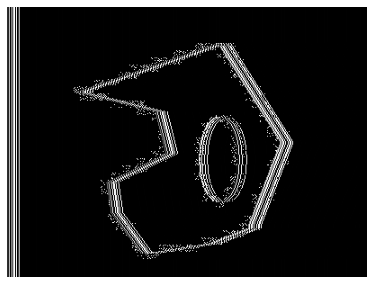

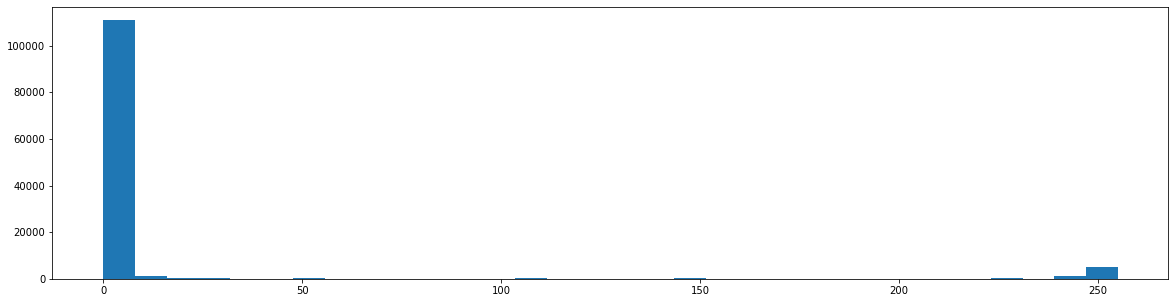

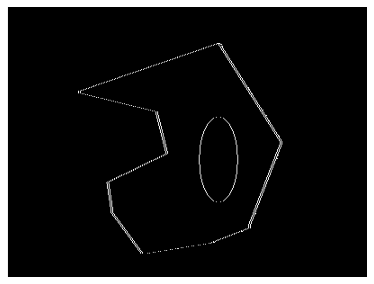

In [99]:
res = lpf_pic(model, 150)
res.plot()

res2 = Image(model.img - res.img)
res2.plot()

res2.histogram(32)

res3 = extract_range(res2, 25, 240)
res3.plot()

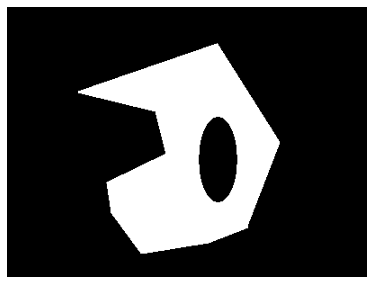

In [121]:
model.threashold(200).plot()

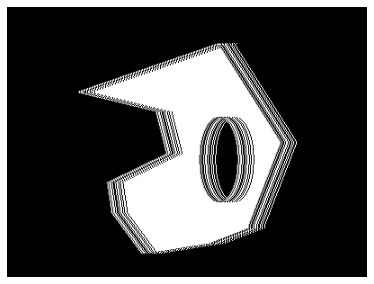

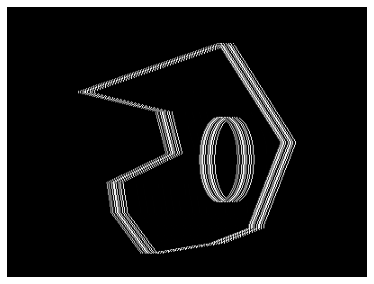

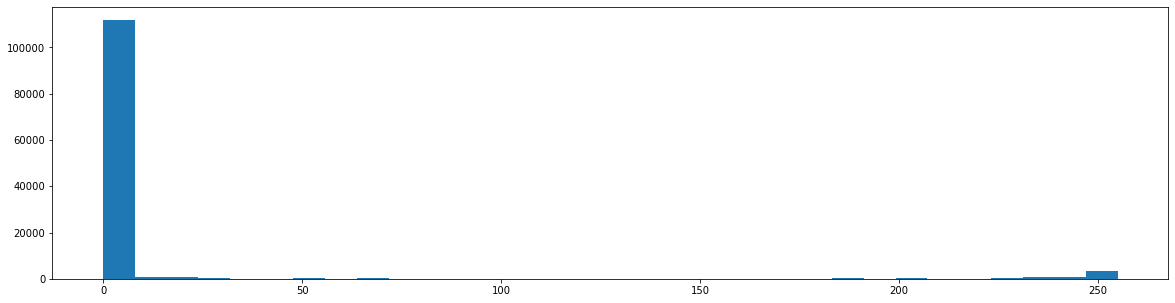

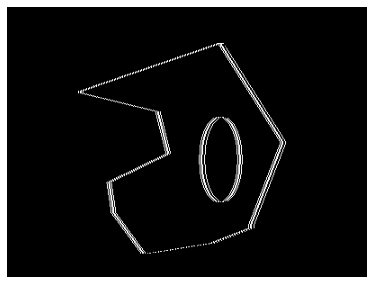

In [123]:
res0 = model.threashold(200)

res = lpf_pic(res0, 150)
res.plot()

res2 = Image(res0.img - res.img)
res2.plot()

res2.histogram(32)

res3 = extract_range(res2, 25, 240)
res3.plot()

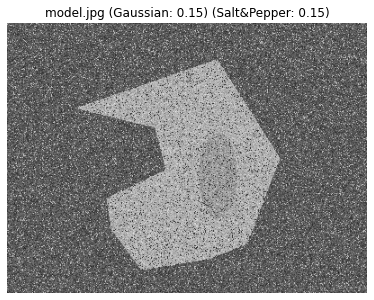

In [124]:
model.noise(0.15, "gauss").noise(0.15, "sp").plot()

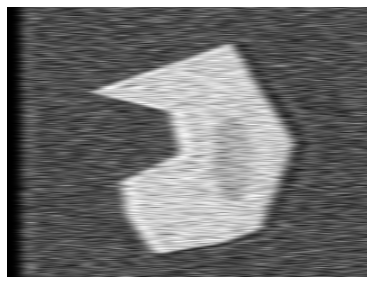

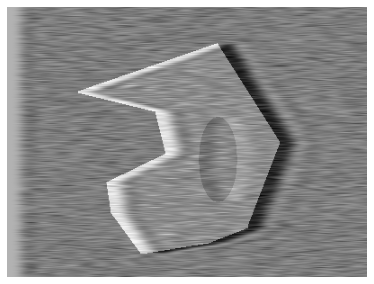

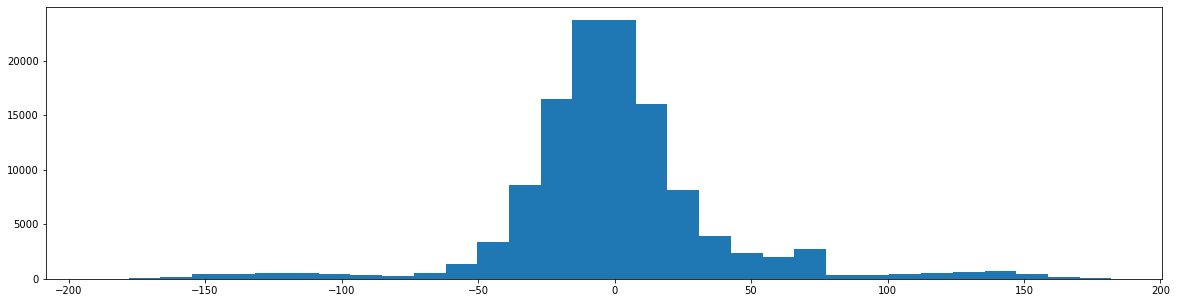

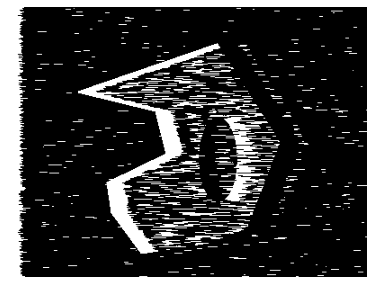

In [117]:
res0 = model.noise(0.15, "gauss").noise(0.15, "sp")

res = lpf_pic(res0, 15)
res.plot()

res2 = Image(model.img - res.img)
res2.plot()

res2.histogram(32)

res3 = extract_range(res2, 25, 245)
res3.plot()

In [130]:
res0 = model.noise(0.15, "gauss").noise(0.15, "sp")
res0 = histogram_segmentation(res0, 220, 25, 3)

res = lpf_pic(res0, 15)
res.plot150)
res2 = Image(res0.img - res.img)
res2.plot()

res2.histogram(32)

res3 = extract_range(res2, 25, 245)
res3.plot()

SyntaxError: unmatched ')' (<ipython-input-130-2a19567bc1d0>, line 5)

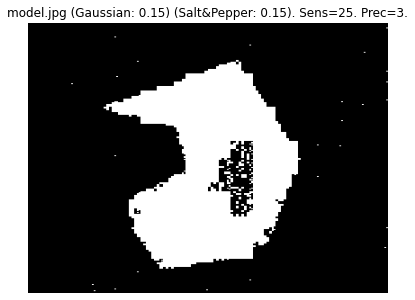

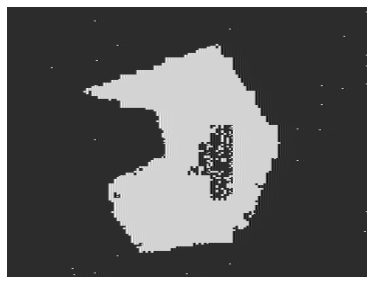

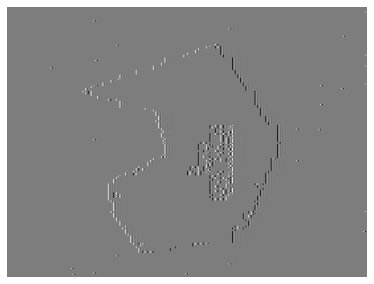

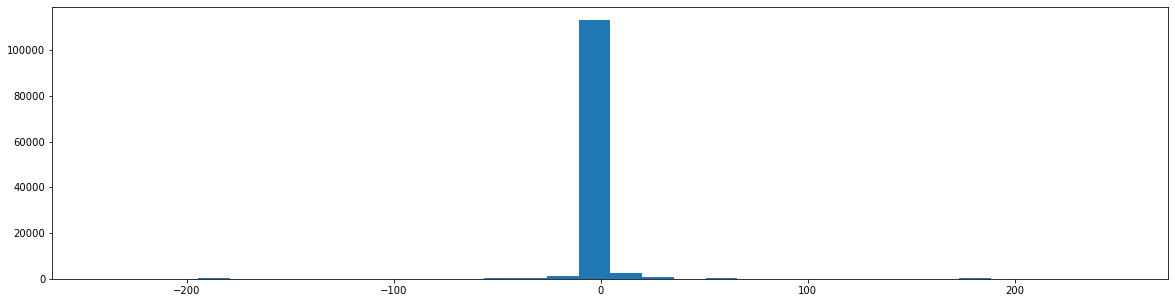

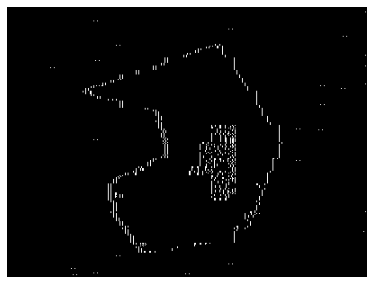

In [131]:
res0 = model.noise(0.15, "gauss").noise(0.15, "sp")
res0 = histogram_segmentation(res0, 220, 25, 3)
res0.plot()

res = lpf_pic(res0, 150)
res.plot()

res2 = Image(res0.img - res.img)
res2.plot()

res2.histogram(32)

res3 = extract_range(res2, 25, 245)
res3.plot()